In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from time import time
from sklearn.datasets import load_files

print("loading train dataset ...")
t = time()
news_train = load_files('datasets/mlcomp/379/train')
print("summary: {0} documents in {1} categories.".format(
    len(news_train.data), len(news_train.target_names)))
print("done in {0} seconds".format(time() - t))

loading train dataset ...
summary: 13180 documents in 20 categories.
done in 5.5758748054504395 seconds


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

print("vectorizing train dataset ...")
t = time()
vectorizer = TfidfVectorizer(encoding='latin-1')
X_train = vectorizer.fit_transform((d for d in news_train.data))
print("n_samples: %d, n_features: %d" % X_train.shape)
print("number of non-zero features in sample [{0}]: {1}".format(
    news_train.filenames[0], X_train[0].getnnz()))
print("done in {0} seconds".format(time() - t))

vectorizing train dataset ...
n_samples: 13180, n_features: 130274
number of non-zero features in sample [datasets/mlcomp/379/train/talk.politics.misc/17860-178992]: 108
done in 4.142234802246094 seconds


In [4]:
from sklearn.naive_bayes import MultinomialNB

print("traning models ...".format(time() - t))
t = time()
y_train = news_train.target
clf = MultinomialNB(alpha=0.0001)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
print("train score: {0}".format(train_score))
print("done in {0} seconds".format(time() - t))

traning models ...


MultinomialNB(alpha=0.0001)

train score: 0.9978755690440061
done in 0.440044641494751 seconds


In [5]:
print("loading test dataset ...")
t = time()
news_test = load_files('datasets/mlcomp/379/test')
print("summary: {0} documents in {1} categories.".format(
    len(news_test.data), len(news_test.target_names)))
print("done in {0} seconds".format(time() - t))

loading test dataset ...
summary: 5648 documents in 20 categories.
done in 2.7798290252685547 seconds


In [6]:
print("vectorizing test dataset ...")
t = time()
X_test = vectorizer.transform((d for d in news_test.data))
y_test = news_test.target
print("n_samples: %d, n_features: %d" % X_test.shape)
print("number of non-zero features in sample [{0}]: {1}".format(
    news_test.filenames[0], X_test[0].getnnz()))
print("done in %fs" % (time() - t))

vectorizing test dataset ...
n_samples: 5648, n_features: 130274
number of non-zero features in sample [datasets/mlcomp/379/test/rec.autos/7429-103268]: 61
done in 1.697848s


In [7]:
pred = clf.predict(X_test[0])
print("predict: {0} is in category {1}".format(
    news_test.filenames[0], news_test.target_names[pred[0]]))
print("actually: {0} is in category {1}".format(
    news_test.filenames[0], news_test.target_names[news_test.target[0]]))

predict: datasets/mlcomp/379/test/rec.autos/7429-103268 is in category rec.autos
actually: datasets/mlcomp/379/test/rec.autos/7429-103268 is in category rec.autos


In [8]:
print("predicting test dataset ...")
t = time()
pred = clf.predict(X_test)
print("done in %fs" % (time() - t))

predicting test dataset ...
done in 0.056055s


In [9]:
from sklearn.metrics import classification_report

print("classification report on test set for classifier:")
print(clf)
print(classification_report(y_test, pred,
                            target_names=news_test.target_names))

classification report on test set for classifier:
MultinomialNB(alpha=0.0001)
                          precision    recall  f1-score   support

             alt.atheism       0.90      0.91      0.91       245
           comp.graphics       0.80      0.90      0.85       298
 comp.os.ms-windows.misc       0.82      0.79      0.80       292
comp.sys.ibm.pc.hardware       0.81      0.80      0.81       301
   comp.sys.mac.hardware       0.90      0.91      0.91       256
          comp.windows.x       0.88      0.88      0.88       297
            misc.forsale       0.87      0.81      0.84       290
               rec.autos       0.92      0.93      0.92       324
         rec.motorcycles       0.96      0.96      0.96       294
      rec.sport.baseball       0.97      0.94      0.96       315
        rec.sport.hockey       0.96      0.99      0.98       302
               sci.crypt       0.95      0.96      0.95       297
         sci.electronics       0.91      0.85      0.88       3

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
print("confusion matrix:")
print(cm)

confusion matrix:
[[224   0   0   0   0   0   0   0   0   0   0   0   0   0   2   5   0   0
    1  13]
 [  1 267   5   5   2   8   1   1   0   0   0   2   3   2   1   0   0   0
    0   0]
 [  1  13 230  24   4  10   5   0   0   0   0   1   2   1   0   0   0   0
    1   0]
 [  0   9  21 242   7   2  10   1   0   0   1   1   7   0   0   0   0   0
    0   0]
 [  0   1   5   5 233   2   2   2   1   0   0   3   1   0   1   0   0   0
    0   0]
 [  0  20   6   3   1 260   0   0   0   2   0   1   0   0   2   0   2   0
    0   0]
 [  0   2   5  12   3   1 235  10   2   3   1   0   7   0   2   0   2   1
    4   0]
 [  0   1   0   0   1   0   8 300   4   1   0   0   1   2   3   0   2   0
    1   0]
 [  0   1   0   0   0   2   2   3 283   0   0   0   1   0   0   0   0   0
    1   1]
 [  0   1   1   0   1   2   1   2   0 297   8   1   0   1   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   2   2 298   0   0   0   0   0   0   0
    0   0]
 [  0   1   2   0   0   1   1   0   0   0   0 2

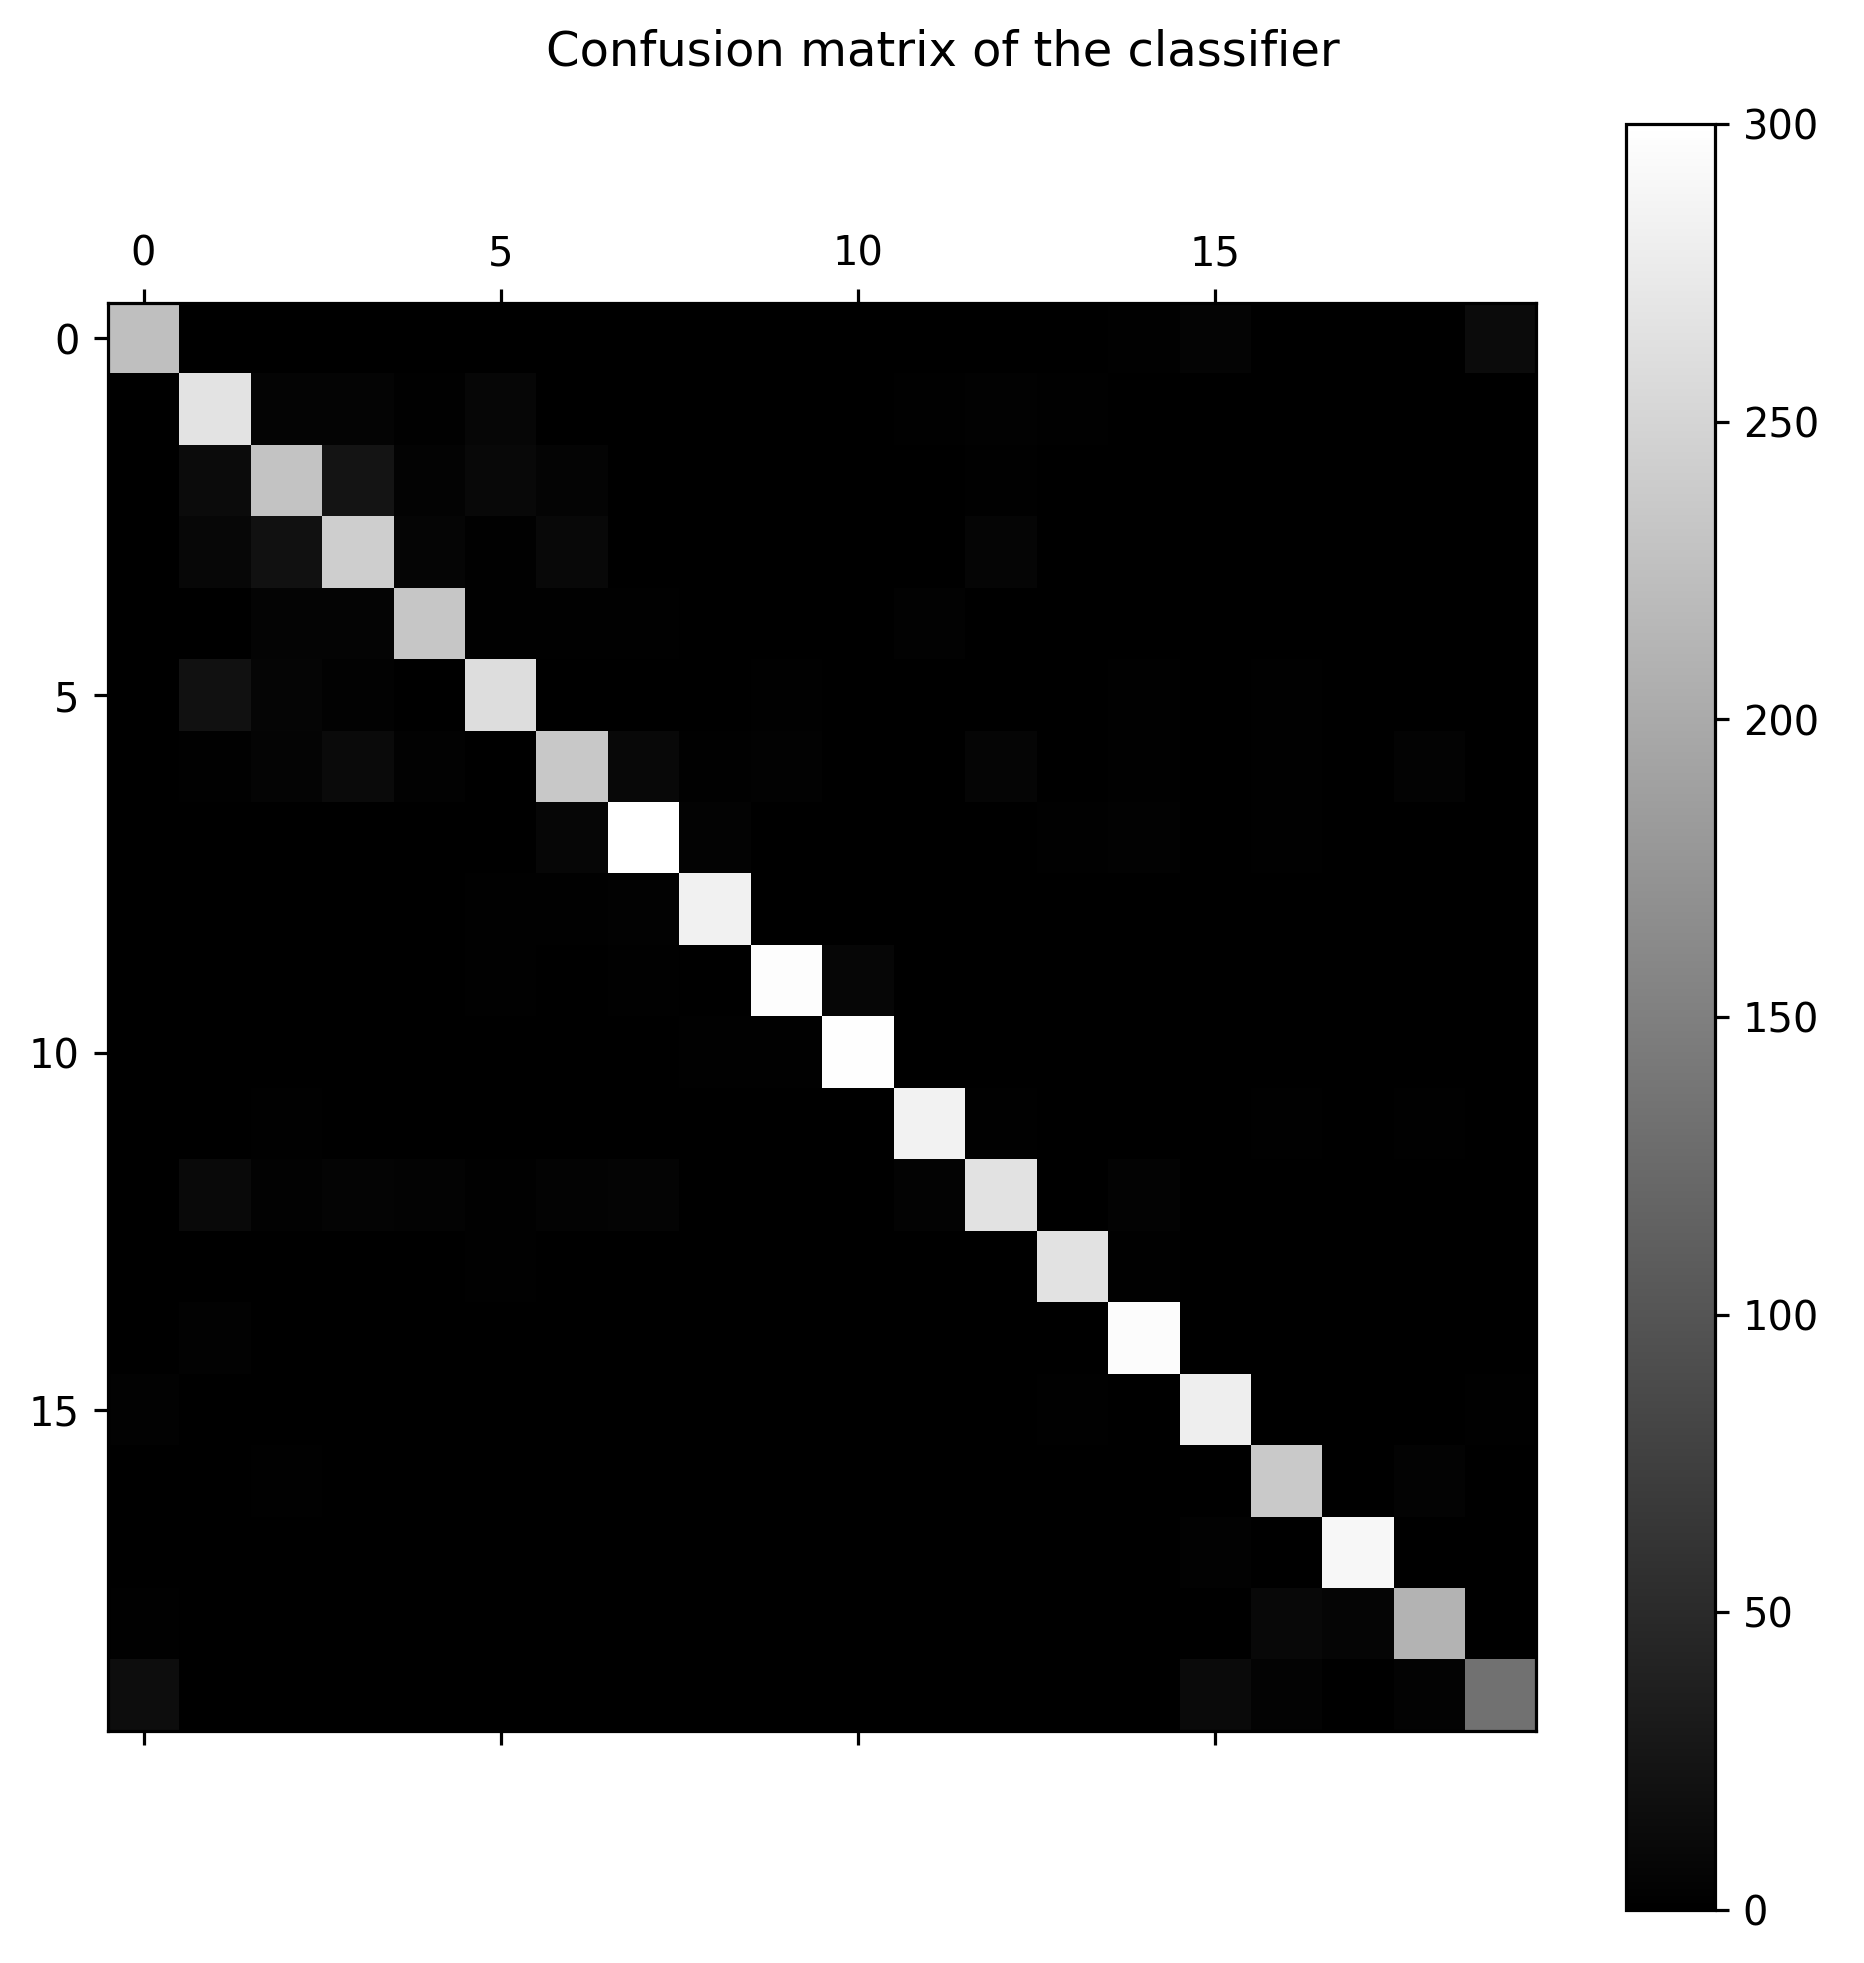

In [11]:
# Show confusion matrix
plt.figure(figsize=(8, 8), dpi=144)
plt.title('Confusion matrix of the classifier')
ax = plt.gca()                                  
ax.spines['right'].set_color('none')            
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.matshow(cm, fignum=1, cmap='gray')
plt.colorbar();